In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Creating Vector x
x = np.random.normal(0, 1, size=5000)

# Creating Vector eps
eps = np.random.normal(0, np.sqrt(0.25), size=5000)

# Creating Vector y
y = 1 - 0.5*x + 2*x**2 - 0.3*x**3 + eps
y1 = 1 - 0.5*x + 2*x**2 - 0.3*x**3 

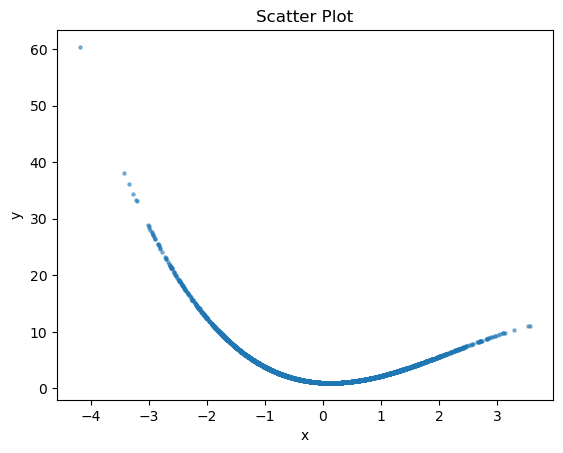

In [4]:
# Visualizing data points generated
plt.scatter(x, y1, s=5, alpha=0.5, label='Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot')
plt.show()

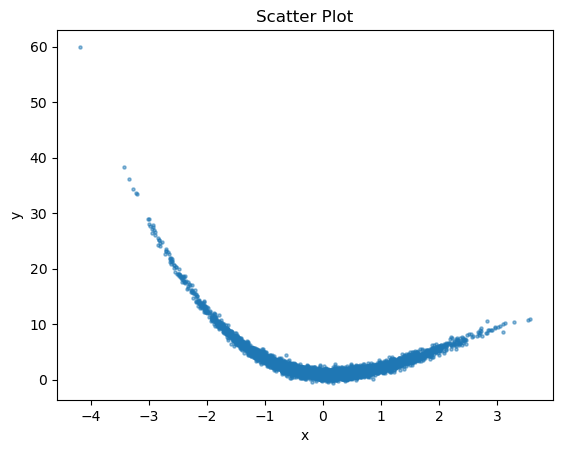

In [5]:
# Visualizing data points generated
plt.scatter(x, y, s=5, alpha=0.5, label='Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot')
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Reshape x and y for TensorFlow
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# Adaline model
def build_adaline_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=1, input_shape=(1,), activation='linear')
    ])
    return model

# Sigmoid model
def build_sigmoid_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=1, input_shape=(1,), activation='sigmoid')
    ])
    return model

# 10-fold cross-validation
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)


adaline_performance_bgd = []
sigmoid_performance_bgd = []

adaline_performance_sgd = []
sigmoid_performance_sgd = []

# Learning rate visualization
learning_rates = [1e-4, 1e-3, 1e-2, 1e-1]
loss_history_adaline_bgd = []
loss_history_adaline_sgd = []
loss_history_sigmoid_bgd = []
loss_history_sigmoid_sgd = []

for lr in learning_rates:
    # Building and compiling the Adaline model with BGD
    adaline_model_bgd = build_adaline_model()
    adaline_model_bgd.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr), loss='mean_squared_error')

    # Train the Adaline model with BGD
    history_adaline_bgd = adaline_model_bgd.fit(x, y, epochs=50, batch_size=len(x), verbose=0,
                                                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)])
    adaline_loss_bgd = history_adaline_bgd.history['loss']
    loss_history_adaline_bgd.append(adaline_loss_bgd)

    # Train the Adaline model with Stochastic GD
    adaline_model_sgd = build_adaline_model()
    adaline_model_sgd.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr), loss='mean_squared_error')
    history_adaline_sgd = adaline_model_sgd.fit(x, y, epochs=50, batch_size=1, verbose=0,
                                                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)])
    adaline_loss_sgd = history_adaline_sgd.history['loss']
    loss_history_adaline_sgd.append(adaline_loss_sgd)

    # Summary for Adaline BGD
    final_adaline_loss_bgd = adaline_loss_bgd[-1]  # Last epoch loss
    min_adaline_loss_bgd = min(adaline_loss_bgd)  # Minimum loss
    avg_adaline_loss_bgd = np.mean(adaline_loss_bgd)  # Average loss

    # Summary for Adaline SGD
    final_adaline_loss_sgd = adaline_loss_sgd[-1]  # Last epoch loss
    min_adaline_loss_sgd = min(adaline_loss_sgd)  # Minimum loss
    avg_adaline_loss_sgd = np.mean(adaline_loss_sgd)  # Average loss


    print(f"Adaline Model  BGD - LR: {lr}")
    print(f"  Final Loss: {final_adaline_loss_bgd:.4f}")
    print(f"  Min Loss: {min_adaline_loss_bgd:.4f}")
    print(f"  Avg Loss: {avg_adaline_loss_bgd:.4f}")
    print("-" * 40)

    print(f"Adaline Model  SGD - LR: {lr}")
    print(f"  Final Loss: {final_adaline_loss_sgd:.4f}")
    print(f"  Min Loss: {min_adaline_loss_sgd:.4f}")
    print(f"  Avg Loss: {avg_adaline_loss_sgd:.4f}")
    print("-" * 40)

    # Building and compiling the Sigmoid model
    sigmoid_model_bgd = build_sigmoid_model()
    sigmoid_model_bgd.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr), loss='mean_squared_error')

    # Train the Sigmoid model with BGD
    history_sigmoid_bgd = sigmoid_model_sgd.fit(x, y, epochs=50, batch_size=len(x), verbose=0,
                                                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)])
    sigmoid_loss_bgd = history_sigmoid_bgd.history['loss']
    loss_history_sigmoid_bgd.append(sigmoid_loss_bgd)

    # Train the Sigmoid model with SGD
    sigmoid_model_sgd = build_sigmoid_model()
    sigmoid_model_sgd.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr), loss='mean_squared_error')
    history_sigmoid_sgd = sigmoid_model_sgd.fit(x, y, epochs=50, batch_size=1, verbose=0,
                                                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)])
    sigmoid_loss_sgd = history_sigmoid_sgd.history['loss']
    loss_history_sigmoid_sgd.append(sigmoid_loss_sgd)

    # Summary for Sigmoid with BGD
    final_sigmoid_loss_bgd = sigmoid_loss_bgd[-1]  # Last epoch loss
    min_sigmoid_loss_bgd = min(sigmoid_loss_bgd)  # Minimum loss
    avg_sigmoid_loss_bgd = np.mean(sigmoid_loss_bgd)  # Average loss

    # Summary for Sigmoid with SGD
    final_sigmoid_loss_sgd = sigmoid_loss_sgd[-1]  # Last epoch loss
    min_sigmoid_loss_sgd = min(sigmoid_loss_sgd)  # Minimum loss
    avg_sigmoid_loss_sgd = np.mean(sigmoid_loss_sgd)  # Average loss

    print(f"Sigmoid Model BGD - LR: {lr}")
    print(f"  Final Loss: {final_sigmoid_loss_bgd:.4f}")
    print(f"  Min Loss: {min_sigmoid_loss_bgd:.4f}")
    print(f"  Avg Loss: {avg_sigmoid_loss_bgd:.4f}")
    print("=" * 40)

    print(f"Sigmoid Model SGD - LR: {lr}")
    print(f"  Final Loss: {final_sigmoid_loss_sgd:.4f}")
    print(f"  Min Loss: {min_sigmoid_loss_sgd:.4f}")
    print(f"  Avg Loss: {avg_sigmoid_loss_sgd:.4f}")
    print("=" * 40)



Adaline Model  BGD - LR: 0.0001
  Final Loss: 20.1205
  Min Loss: 20.1205
  Avg Loss: 20.2196
----------------------------------------
Adaline Model  SGD - LR: 0.0001
  Final Loss: 10.0969
  Min Loss: 10.0919
  Avg Loss: 10.5118
----------------------------------------
Sigmoid Model BGD - LR: 0.0001
  Final Loss: 20.1191
  Min Loss: 20.1191
  Avg Loss: 20.1205
Sigmoid Model SGD - LR: 0.0001
  Final Loss: 17.0985
  Min Loss: 17.0985
  Avg Loss: 17.3186
Adaline Model  BGD - LR: 0.001
  Final Loss: 18.5440
  Min Loss: 18.5440
  Avg Loss: 19.4321
----------------------------------------
Adaline Model  SGD - LR: 0.001
  Final Loss: 10.1361
  Min Loss: 10.1020
  Avg Loss: 10.2239
----------------------------------------
Sigmoid Model BGD - LR: 0.001
  Final Loss: 18.7246
  Min Loss: 18.7246
  Avg Loss: 18.7328
Sigmoid Model SGD - LR: 0.001
  Final Loss: 17.0593
  Min Loss: 17.0593
  Avg Loss: 17.0936
Adaline Model  BGD - LR: 0.01
  Final Loss: 12.5748
  Min Loss: 12.5748
  Avg Loss: 18.1271


In [17]:

adaline_performance_sgd = []
sigmoid_performance_sgd = []

# Learning rate visualization
learning_rates = [1e-4, 1e-3, 1e-2, 1e-1]

loss_history_adaline_sgd = []

loss_history_sigmoid_sgd = []

for lr in learning_rates:


    # Train the Adaline model with Stochastic GD
    adaline_model_sgd = build_adaline_model()
    adaline_model_sgd.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr), loss='mean_squared_error')
    history_adaline_sgd = adaline_model_sgd.fit(x, y, epochs=50, batch_size=1, verbose=0,
                                                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)])
    adaline_loss_sgd = history_adaline_sgd.history['loss']
    loss_history_adaline_sgd.append(adaline_loss_sgd)

    # Summary for Adaline SGD
    final_adaline_loss_sgd = adaline_loss_sgd[-1]  # Last epoch loss
    min_adaline_loss_sgd = min(adaline_loss_sgd)  # Minimum loss
    avg_adaline_loss_sgd = np.mean(adaline_loss_sgd)  # Average loss

    print(f"Adaline Model  SGD - LR: {lr}")
    print(f"  Final Loss: {final_adaline_loss_sgd:.4f}")
    print(f"  Min Loss: {min_adaline_loss_sgd:.4f}")
    print(f"  Avg Loss: {avg_adaline_loss_sgd:.4f}")
    print("-" * 40)

    # Building and compiling the Sigmoid model
    sigmoid_model_sgd = build_sigmoid_model()
    sigmoid_model_sgd.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr), loss='mean_squared_error')
    # Train the Sigmoid model with SGD
    history_sigmoid_sgd = sigmoid_model_sgd.fit(x, y, epochs=50, batch_size=1, verbose=0,
                                                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)])
    sigmoid_loss_sgd = history_sigmoid_sgd.history['loss']
    loss_history_sigmoid_sgd.append(sigmoid_loss_sgd)

    # Summary for Sigmoid with SGD
    final_sigmoid_loss_sgd = sigmoid_loss_sgd[-1]  # Last epoch loss
    min_sigmoid_loss_sgd = min(sigmoid_loss_sgd)  # Minimum loss
    avg_sigmoid_loss_sgd = np.mean(sigmoid_loss_sgd)  # Average loss

    print(f"Sigmoid Model SGD - LR: {lr}")
    print(f"  Final Loss: {final_sigmoid_loss_sgd:.4f}")
    print(f"  Min Loss: {min_sigmoid_loss_sgd:.4f}")
    print(f"  Avg Loss: {avg_sigmoid_loss_sgd:.4f}")
    print("=" * 40)

Adaline Model  SGD - LR: 0.0001
  Final Loss: 10.0982
  Min Loss: 10.0915
  Avg Loss: 10.4011
----------------------------------------
Sigmoid Model SGD - LR: 0.0001
  Final Loss: 17.0984
  Min Loss: 17.0984
  Avg Loss: 17.3127
Adaline Model  SGD - LR: 0.001
  Final Loss: 10.1519
  Min Loss: 10.1334
  Avg Loss: 10.2234
----------------------------------------
Sigmoid Model SGD - LR: 0.001
  Final Loss: 17.0593
  Min Loss: 17.0593
  Avg Loss: 17.0859
Adaline Model  SGD - LR: 0.01
  Final Loss: 10.8158
  Min Loss: 10.7793
  Avg Loss: 10.8188
----------------------------------------
Sigmoid Model SGD - LR: 0.01
  Final Loss: 17.0556
  Min Loss: 17.0556
  Avg Loss: 17.0592
Adaline Model  SGD - LR: 0.1
  Final Loss: 19.9131
  Min Loss: 18.8576
  Avg Loss: 20.7286
----------------------------------------
Sigmoid Model SGD - LR: 0.1
  Final Loss: 17.0553
  Min Loss: 17.0553
  Avg Loss: 17.0559


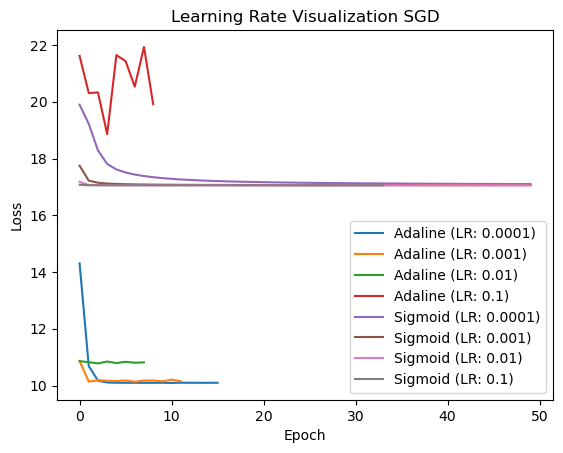

In [18]:
# Plot the learning rate against the loss for Adaline (SGD)
for i, lr in enumerate(learning_rates):
    plt.plot(loss_history_adaline_sgd[i], label=f'Adaline (LR: {lr})')

# Plot the learning rate against the loss for Sigmoid (SGD)
for i, lr in enumerate(learning_rates):
    plt.plot(loss_history_sigmoid_sgd[i], label=f'Sigmoid (LR: {lr})')

plt.title('Learning Rate Visualization SGD')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

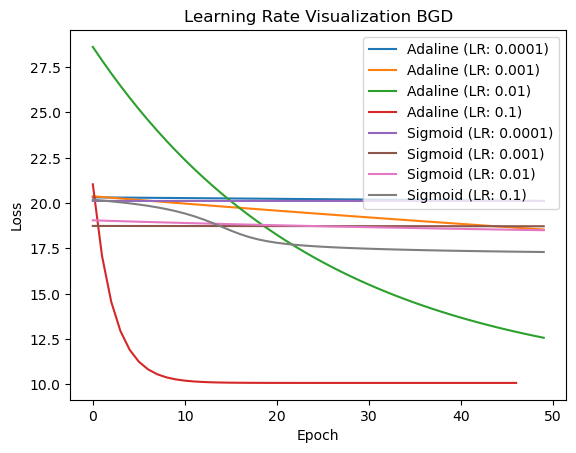

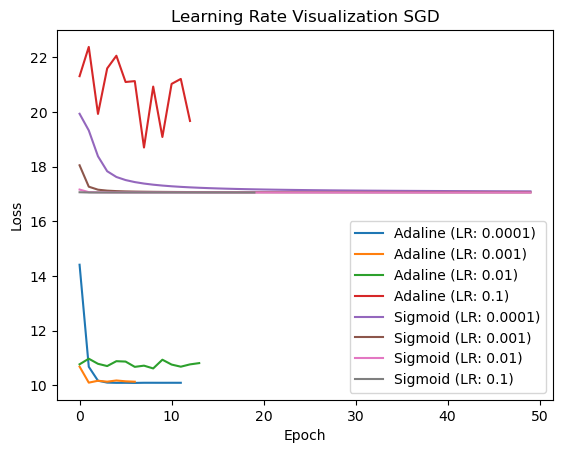

In [15]:
# Plot the learning rate against the loss for Adaline (BGD)
for i, lr in enumerate(learning_rates):
    plt.plot(loss_history_adaline_bgd[i], label=f'Adaline (LR: {lr})')

# Plot the learning rate against the loss for Sigmoid (BGD)
for i, lr in enumerate(learning_rates):
    plt.plot(loss_history_sigmoid_bgd[i], label=f'Sigmoid (LR: {lr})')

plt.title('Learning Rate Visualization BGD')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the learning rate against the loss for Adaline (SGD)
for i, lr in enumerate(learning_rates):
    plt.plot(loss_history_adaline_sgd[i], label=f'Adaline (LR: {lr})')

# Plot the learning rate against the loss for Sigmoid (SGD)
for i, lr in enumerate(learning_rates):
    plt.plot(loss_history_sigmoid_sgd[i], label=f'Sigmoid (LR: {lr})')

plt.title('Learning Rate Visualization SGD')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
adaline_performance_bgd = []
sigmoid_performance_bgd = []

adaline_performance_sgd = []
sigmoid_performance_sgd = []

for train_index, test_index in kf.split(x):
    x_train, x_val = x[train_index], x[test_index]
    y_train, y_val = y[train_index], y[test_index]

    # Build and compile the Adaline model with BGD
    adaline_model = build_adaline_model()
    adaline_model.compile(optimizer='sgd', loss='mean_squared_error')

    # Train the Adaline model with BGD
    adaline_model.fit(x_train, y_train, epochs=50, batch_size=len(x_train), verbose=0,  callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)])

    # Evaluate the Adaline model
    adaline_loss = adaline_model.evaluate(x_val, y_val, verbose=0)
    adaline_performance_bgd.append(adaline_loss)

    # Build and compile the Adaline model with SGD
    adaline_model = build_adaline_model()
    adaline_model.compile(optimizer='sgd', loss='mean_squared_error')

    # Train the Adaline model with BGD
    adaline_model.fit(x_train, y_train, epochs=50, batch_size=1, verbose=0,  callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)])

    # Evaluate the Adaline model
    adaline_loss = adaline_model.evaluate(x_val, y_val, verbose=0)
    adaline_performance_sgd.append(adaline_loss)

    # Build and compile the Sigmoid model with BGD
    sigmoid_model = build_sigmoid_model()
    sigmoid_model.compile(optimizer='sgd', loss='mean_squared_error')

    # Train the Sigmoid model
    sigmoid_model.fit(x_train, y_train, epochs=50, batch_size=len(x_train), verbose=0,  callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)])

    # Evaluate the Sigmoid model
    sigmoid_loss = sigmoid_model.evaluate(x_val, y_val, verbose=0)
    sigmoid_performance_bgd.append(sigmoid_loss)

    # Build and compile the Sigmoid model with SGD
    sigmoid_model = build_sigmoid_model()
    sigmoid_model.compile(optimizer='sgd', loss='mean_squared_error')

    # Train the Sigmoid model
    sigmoid_model.fit(x_train, y_train, epochs=50, batch_size=1, verbose=0,  callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)])

    # Evaluate the Sigmoid model
    sigmoid_loss = sigmoid_model.evaluate(x_val, y_val, verbose=0)
    sigmoid_performance_sgd.append(sigmoid_loss)

# average performance across all folds
adaline_average_performance_bgd = np.mean(adaline_performance_bgd)
adaline_average_performance_sgd = np.mean(adaline_performance_sgd)
sigmoid_average_performance_bgd = np.mean(sigmoid_performance_bgd)
sigmoid_average_performance_sgd = np.mean(sigmoid_performance_sgd)

print(f'Adaline (BGD) Average Validation Loss: {adaline_average_performance_bgd}')
print(f'Adaline (SGD) Average Validation Loss: {adaline_average_performance_sgd}')
print(f'Sigmoid (BGD) Average Validation Loss: {sigmoid_average_performance_bgd}')
print(f'Sigmoid (SGD) Average Validation Loss: {sigmoid_average_performance_sgd}')

Adaline (BGD) Average Validation Loss: 11.983743000030518
Adaline (SGD) Average Validation Loss: 10.891946792602539
Sigmoid (BGD) Average Validation Loss: 18.991696929931642
Sigmoid (SGD) Average Validation Loss: 17.055685234069824


In [20]:
# Define the new optimizers to experiment with
optimizers = ['adam', 'rmsprop', 'adagrad']

# Initialize lists to store the performance metrics for each optimizer
adaline_performance_optimizers = []
sigmoid_performance_optimizers = []

# Loop over each optimizer and train the models again
for optimizer_name in optimizers:
    for train_index, test_index in kf.split(x):
        x_train, x_val = x[train_index], x[test_index]
        y_train, y_val = y[train_index], y[test_index]

        # Build and compile the Adaline model with the selected optimizer
        adaline_model = build_adaline_model()
        adaline_model.compile(optimizer=optimizer_name, loss='mean_squared_error')

        # Train the Adaline model
        adaline_model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=0,
                          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)])

        # Evaluate the Adaline model
        adaline_loss = adaline_model.evaluate(x_val, y_val, verbose=0)
        adaline_performance_optimizers.append((optimizer_name, adaline_loss))

        # Build and compile the Sigmoid model with the selected optimizer
        sigmoid_model = build_sigmoid_model()
        sigmoid_model.compile(optimizer=optimizer_name, loss='mean_squared_error')

        # Train the Sigmoid model
        sigmoid_model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=0,
                          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)])

        # Evaluate the Sigmoid model
        sigmoid_loss = sigmoid_model.evaluate(x_val, y_val, verbose=0)
        sigmoid_performance_optimizers.append((optimizer_name, sigmoid_loss))

# Print the performance for each optimizer and model
for optimizer_name in optimizers:
    adaline_losses = [loss for opt, loss in adaline_performance_optimizers if opt == optimizer_name]
    sigmoid_losses = [loss for opt, loss in sigmoid_performance_optimizers if opt == optimizer_name]

    print(f'Adaline Average Validation Loss ({optimizer_name.capitalize()}): {np.mean(adaline_losses)}')
    print(f'Sigmoid Average Validation Loss ({optimizer_name.capitalize()}): {np.mean(sigmoid_losses)}')

Adaline Average Validation Loss (Adam): 11.09705400466919
Sigmoid Average Validation Loss (Adam): 17.3794002532959
Adaline Average Validation Loss (Rmsprop): 10.675758695602417
Sigmoid Average Validation Loss (Rmsprop): 17.28537483215332
Adaline Average Validation Loss (Adagrad): 20.60002212524414
Sigmoid Average Validation Loss (Adagrad): 19.311641788482667


**Question 2**

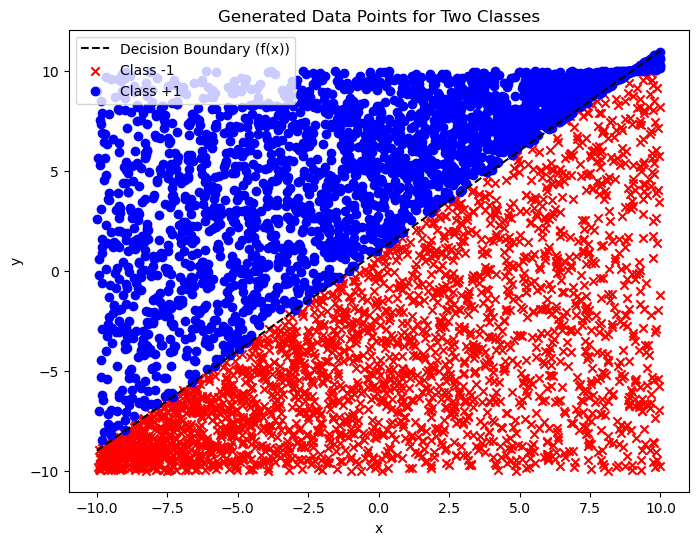

In [8]:

import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold, train_test_split
import matplotlib.pyplot as plt
import time

np.random.seed(42)
num_points = 2500

# separating function f(x) = x + 1
f = lambda x: x + 1

# class -1 points (below f)
x_neg = np.random.uniform(-10, 10, num_points)
y_neg = np.random.uniform(-10, f(x_neg), num_points)

# class +1 points (above f)
x_pos = np.random.uniform(-10, 10, num_points)
y_pos = np.random.uniform(f(x_pos), 10, num_points)

# Create dataset and labels
X = np.vstack((np.column_stack((x_neg, y_neg)), np.column_stack((x_pos, y_pos))))
y = np.hstack((-1 * np.ones(num_points), np.ones(num_points)))

# Plot the decision boundary
plt.figure(figsize=(8, 6))
x_range = np.linspace(-10, 10, 100)
plt.plot(x_range, f(x_range), 'k--', label='Decision Boundary (f(x))')
plt.scatter(x_neg, y_neg, color='red', marker='x', label='Class -1')
plt.scatter(x_pos, y_pos, color='blue', marker='o', label='Class +1')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Generated Data Points for Two Classes")
plt.show()


In [22]:
class Perceptron:
    def __init__(self, eta=0.01):
        self.eta = eta  # Learning rate
        self.w = None  # Weights will be initialized during training

    def predict(self, X):
        # Add bias term to input features
        X_bias = np.c_[X, np.ones(X.shape[0])]
        return np.sign(np.dot(X_bias, self.w))

    def train(self, X, y):
        X_bias = np.c_[X, np.ones(X.shape[0])]  # Add bias term to input features
        self.w = np.random.rand(X_bias.shape[1])  # Initialize weights including bias
        converged = False
        epochs = 0
        while not converged:
            epochs += 1
            errors = 0
            for i in range(len(X_bias)):
                prediction = self.predict(X[i].reshape(1, -1))
                update = self.eta * (y[i] - prediction)
                self.w += update * X_bias[i]  # Update with bias term
                errors += int(update != 0)  # Check for update (error)
            converged = errors == 0
        # print(f"Converged in {epochs} epochs")

    def accuracy(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y)   
       
#cross validation
def cv_perceptron(X, y, k_folds=5, elr=0.01):
  kf = KFold(n_splits=k_folds, shuffle=True)
  accuracy_scores = []
  for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = Perceptron(lr)
    model.train(X_train, y_train)
    accuracy_scores.append(model.accuracy(X_test, y_test))
  return np.mean(accuracy_scores)


In [23]:
import time
from sklearn.model_selection import train_test_split

def evaluate_perceptron(X, y, train_sizes=[0.5, 0.6, 0.7, 0.8]):
    accuracies = []
    for train_size in train_sizes:
      X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)
      
      start = time.time()
      accuracy = cv_perceptron(X_train, y_train, elr=0.01)
      elapsed_time = time.time() - start
      accuracies.append(accuracy)
      print(f"Train size: {train_size*100:.0f}%, Accuracy: {accuracy:.4f}, Time: {elapsed_time:.4f} sec")

print("\nTraining Perceptron...")
evaluate_perceptron(X, y)


Training Perceptron...


C:\Users\johna\AppData\Local\Temp\ipykernel_33732\3309625911.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0)  # Check for update (error)


KeyboardInterrupt: 

In [9]:
# Adaline Model
class Adaline(tf.keras.Model):
    def __init__(self, input_dim):
        super(Adaline, self).__init__()
        self.dense = tf.keras.layers.Dense(1, input_shape=(input_dim,))
    
    def call(self, inputs):
        return self.dense(inputs)

# Sigmoid Neuron Model
class SigmoidNeuron(tf.keras.Model):
    def __init__(self, input_dim):
        super(SigmoidNeuron, self).__init__()
        self.dense = tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(input_dim,))
    
    def call(self, inputs):
        return self.dense(inputs)

# Train Model using K-Fold Cross-Validation
def train_model_kfold(ModelClass, X, y, k=5, epochs=10, lr=0.01, train_sizes=[0.5, 0.6, 0.7, 0.8]):
    results = {}
    
    for train_size in train_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)
        kf = KFold(n_splits=k, shuffle=True, random_state=42)
        accuracies = []
        
        for train_index, test_index in kf.split(X_train):
            X_k_train, X_k_val = X_train[train_index], X_train[test_index]
            y_k_train, y_k_val = y_train[train_index], y_train[test_index]
            
            model = ModelClass(input_dim=X.shape[1])
            model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr), loss='mean_squared_error', metrics=['accuracy'])
            
            start = time.time()
            model.fit(X_k_train, y_k_train, epochs=epochs, verbose=0)
            elapsed_time = time.time() - start

            _, accuracy = model.evaluate(X_k_val, y_k_val, verbose=0)
            accuracies.append(accuracy)
        
        results[train_size] = np.mean(accuracies)
        # print(f"Mean Accuracy for {ModelClass.__name__} with training size {train_size * 100:.0f}%: {results[train_size]:.4f}")
        print(f"Train size: {train_size*100:.0f}%, Accuracy: {results[train_size]:.4f}, Time: {elapsed_time:.4f} sec")

    return results


print("\nTraining Adaline...")
train_model_kfold(Adaline, X, y)
print("\nTraining Sigmoid Neuron...")
train_model_kfold(SigmoidNeuron, X, y)


Training Adaline...


c:\Users\johna\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train size: 50%, Accuracy: 0.3488, Time: 1.3635 sec
Train size: 60%, Accuracy: 0.3867, Time: 1.1724 sec
Train size: 70%, Accuracy: 0.3357, Time: 1.3292 sec
Train size: 80%, Accuracy: 0.3480, Time: 1.2592 sec

Training Sigmoid Neuron...
Train size: 50%, Accuracy: 0.4936, Time: 1.3516 sec
Train size: 60%, Accuracy: 0.4687, Time: 0.9442 sec
Train size: 70%, Accuracy: 0.4937, Time: 1.6558 sec
Train size: 80%, Accuracy: 0.4893, Time: 1.3280 sec


{0.5: 0.4935999870300293,
 0.6: 0.4686666548252106,
 0.7: 0.4937142848968506,
 0.8: 0.4892500102519989}

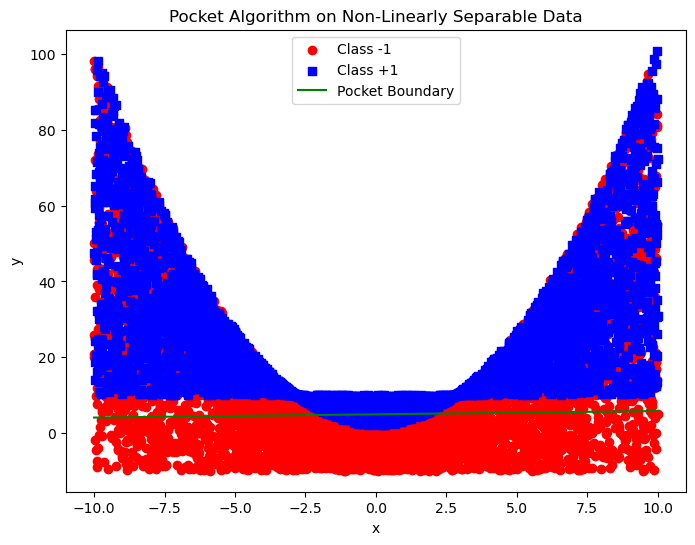

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic dataset (non-linearly separable)
np.random.seed(42)
num_points = 5000

f = lambda x:  x**2 + 2

# Generate class -1 points (below f) with noise
x_neg = np.random.uniform(-10, 10, num_points)
y_neg = np.random.uniform(-10, f(x_neg), num_points)

# Generate class +1 points (above f) with noise
x_pos = np.random.uniform(-10, 10, num_points)
y_pos = np.random.uniform(f(x_pos), 10, num_points)

# Create dataset and labels
X = np.vstack((np.column_stack((x_neg, y_neg)), np.column_stack((x_pos, y_pos))))
y = np.hstack((-1 * np.ones(num_points), np.ones(num_points)))

# Add bias term to X
X = np.column_stack((np.ones(2 * num_points), X))

# Pocket Algorithm
def pocket_algorithm(X, y, max_iter=10000):
    w = np.zeros(X.shape[1])  # Initialize weights
    best_w = w.copy()
    best_score = 0
    
    for _ in range(max_iter):
        misclassified = 0
        for i in range(len(y)):
            if np.sign(np.dot(w, X[i])) != y[i]:
                w += y[i] * X[i]  # Update weights
                
                # Evaluate performance
                predictions = np.sign(X @ w)
                score = np.sum(predictions == y)
                
                if score > best_score:
                    best_w = w.copy()
                    best_score = score
                
                misclassified += 1
        
        if misclassified == 0:
            break  # Stop if all points are correctly classified
    
    return best_w

# Train using Pocket Algorithm
weights = pocket_algorithm(X, y)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(x_neg, y_neg, color='red', marker='o', label='Class -1')
plt.scatter(x_pos, y_pos, color='blue', marker='s', label='Class +1')

# Plot the learned decision boundary
x_vals = np.linspace(-10, 10, 100)
y_vals = -(weights[0] + weights[1] * x_vals) / weights[2]
plt.plot(x_vals, y_vals, 'g-', label='Pocket Boundary')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Pocket Algorithm on Non-Linearly Separable Data')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

def evaluate_pocket(X, y, train_sizes=[0.5, 0.6, 0.7, 0.8]):
    results = {}
    for train_size in train_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)
        
        start_time = time.time()
        weights = pocket_algorithm(X_train, y_train)
        elapsed_time = time.time() - start_time
        
        y_pred = np.sign(X_test @ weights)
        accuracy = np.mean(y_pred == y_test)
        
        results[train_size] = {'accuracy': accuracy, 'time': elapsed_time}
        
        print(f"Train size: {train_size*100:.0f}%, Accuracy: {accuracy:.4f}, Time: {elapsed_time:.4f} sec")
    
    return results

# Run evaluation
print("\nTraining Pocket...")
evaluate_pocket(X, y)
print("\nTraining Adaline...")
train_model_kfold(Adaline, X, y)
print("\nTraining Sigmoid Neuron...")
train_model_kfold(SigmoidNeuron, X, y)
print("\nTraining Perceptron...")
evaluate_perceptron(X, y)


Training Pocket...
Train size: 50%, Accuracy: 0.8800, Time: 0.6232 sec
Train size: 60%, Accuracy: 0.9000, Time: 0.6862 sec
Train size: 70%, Accuracy: 0.7333, Time: 0.7327 sec
Train size: 80%, Accuracy: 0.9000, Time: 0.7833 sec


{0.5: {'accuracy': 0.88, 'time': 0.62319016456604},
 0.6: {'accuracy': 0.9, 'time': 0.6862139701843262},
 0.7: {'accuracy': 0.7333333333333333, 'time': 0.7326581478118896},
 0.8: {'accuracy': 0.9, 'time': 0.7833483219146729}}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])  # XOR output

# Pocket Algorithm Implementation
class PocketAlgorithm:
    def __init__(self, max_iter=1000):
        self.max_iter = max_iter
        self.weights = None
        self.best_weights = None
        self.best_accuracy = 0
    
    def fit(self, X, y):
        # Add bias term (append column of ones)
        X_bias = np.c_[np.ones(X.shape[0]), X]
        
        # Initialize weights
        self.weights = np.random.randn(X_bias.shape[1])  # Random initialization
        self.best_weights = np.copy(self.weights)
        
        for _ in range(self.max_iter):
            # Make predictions
            y_pred = self.predict(X)
            current_accuracy = accuracy_score(y, y_pred)
            
            # Update best weights if current accuracy is better
            if current_accuracy > self.best_accuracy:
                self.best_accuracy = current_accuracy
                self.best_weights = np.copy(self.weights)
            
            # Find misclassified points
            misclassified = np.where(y_pred != y)[0]
            if len(misclassified) == 0:
                break
                
            # Update weights using a random misclassified point
            idx = np.random.choice(misclassified)
            self.weights += (y[idx] - y_pred[idx]) * X_bias[idx]
        
    def predict(self, X):
        X_bias = np.c_[np.ones(X.shape[0]), X]
        return np.where(np.dot(X_bias, self.best_weights) >= 0, 1, 0)

# Adaline Implementation
class Adaline:
    def __init__(self, max_iter=1000, learning_rate=0.01):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.weights = None
        self.errors_ = []
    
    def activation(self, X):
        return np.dot(X, self.weights)
    
    def fit(self, X, y):
        # Add bias term
        X_bias = np.c_[np.ones(X.shape[0]), X]
        
        # Initialize weights
        self.weights = np.random.randn(X_bias.shape[1])
        
        # Train the model
        for _ in range(self.max_iter):
            net_input = self.activation(X_bias)
            errors = y - net_input
            self.weights += self.learning_rate * np.dot(X_bias.T, errors)
            self.errors_.append(np.mean(errors**2))
            
            # Early stopping if convergence is reached
            if len(self.errors_) > 1 and abs(self.errors_[-1] - self.errors_[-2]) < 1e-7:
                break
    
    def predict(self, X):
        X_bias = np.c_[np.ones(X.shape[0]), X]
        return np.where(self.activation(X_bias) >= 0.0, 1, 0)

# Sigmoid Model Implementation
class SigmoidNeuron:
    def __init__(self, max_iter=1000, learning_rate=0.1):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.weights = None
        self.errors_ = []
    
    def sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-np.clip(z, -250, 250)))
    
    def fit(self, X, y):
        # Add bias term
        X_bias = np.c_[np.ones(X.shape[0]), X]
        
        # Initialize weights
        self.weights = np.random.randn(X_bias.shape[1])
        
        # Train the model
        for _ in range(self.max_iter):
            # Forward pass
            output = self.sigmoid(np.dot(X_bias, self.weights))
            
            # Backward pass
            errors = y - output
            self.errors_.append(np.mean(errors**2))
            
            # Update weights using gradient descent
            gradient = np.dot(X_bias.T, errors * output * (1 - output))
            self.weights += self.learning_rate * gradient
            
            # Early stopping if convergence is reached
            if len(self.errors_) > 1 and abs(self.errors_[-1] - self.errors_[-2]) < 1e-7:
                break
    
    def predict(self, X):
        X_bias = np.c_[np.ones(X.shape[0]), X]
        return np.where(self.sigmoid(np.dot(X_bias, self.weights)) >= 0.5, 1, 0)

# Evaluation code
def evaluate_models(X, y, train_splits, n_runs=10):
    results = {
        'Pocket': [],
        'Adaline': [],
        'Sigmoid': []
    }
    
    for split in train_splits:
        split_results = {model: [] for model in results.keys()}
        
        for _ in range(n_runs):
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split, random_state=None)
            
            # Pocket Algorithm
            pocket = PocketAlgorithm(max_iter=1000)
            pocket.fit(X_train, y_train)
            split_results['Pocket'].append(accuracy_score(y_test, pocket.predict(X_test)))
            
            # Adaline
            adaline = Adaline(max_iter=1000, learning_rate=0.01)
            adaline.fit(X_train, y_train)
            split_results['Adaline'].append(accuracy_score(y_test, adaline.predict(X_test)))
            
            # Sigmoid
            sigmoid = SigmoidNeuron(max_iter=1000, learning_rate=0.1)
            sigmoid.fit(X_train, y_train)
            split_results['Sigmoid'].append(accuracy_score(y_test, sigmoid.predict(X_test)))
        
        # Store average results
        for model in results.keys():
            results[model].append(np.mean(split_results[model]))
    
    return results

# Run evaluation
train_splits = [0.5, 0.6, 0.7, 0.8]
results = evaluate_models(X, y, train_splits)

# Plot results
plt.figure(figsize=(10, 6))
for model, accuracies in results.items():
    plt.plot(train_splits, accuracies, label=model, marker='o')

plt.xlabel('Training Data Split')
plt.ylabel('Average Accuracy')
plt.title('Model Comparison on XOR Dataset')
plt.legend()
plt.grid(True)
plt.show()